In [1]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
from time import time
from torchviz import make_dot
import numpy as np

In [2]:
def plot_mnist_number(img):
    plt.imshow(img.numpy().squeeze(), cmap='gray', interpolation='none')

In [3]:
input_size = 784
hidden_sizes = [256, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim = 1))
print(model)

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,)),])

testset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)
trainset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
images, labels = next(iter(trainloader))  
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
      images = images.view(images.shape[0], -1)
      optimizer.zero_grad()          
      output = model(images)
      loss = criterion(output, labels)
      
      #backprop
      loss.backward()
      
      #adjust weights
      optimizer.step()
      
      running_loss += loss.item()
    else:
        print(f"Epoch {e} - Training loss: {running_loss/len(trainloader)}")
print("\nTraining Time (in minutes) =",(time()-time0)/60)  

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Epoch 0 - Training loss: 1.2148343305678884
Epoch 1 - Training loss: 0.4195368013754012
Epoch 2 - Training loss: 0.33049559042711923
Epoch 3 - Training loss: 0.2933747117781335
Epoch 4 - Training loss: 0.2660461610574631
Epoch 5 - Training loss: 0.23721121173280818
Epoch 6 - Training loss: 0.21196551706380906
Epoch 7 - Training loss: 0.1913309885295713
Epoch 8 - Training loss: 0.17403464880623634
Epoch 9 - Training loss: 0.153100471848705
Epoch 10 - Training loss: 0.1402829543800111
Epoch 11 - Training loss: 0.12582787783567312
Epoch 12 - Training loss: 0.11622579398143823
Epoch 13 - Training loss: 0.10129925348813747
Epoch 14 - Training loss: 0.0922322373505041

Training Time (in minutes) = 0.5676670670509338


Predicted Digit = 0


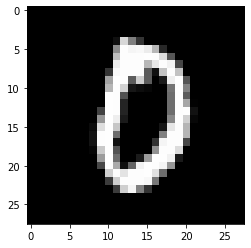

In [4]:
images, labels = next(iter(testloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

print("Predicted Digit =", probab.index(max(probab)))

plot_mnist_number(img.view(1, 28, 28))